In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
import yfinance as yf
nse_ticker = "^NSEI"

# Fetch BSE data
nse_data = yf.download(nse_ticker, start="2013-01-21", end="2023-06-30")

bse_ticker = "^BSESN"
# Fetch BSE data
bse_data = yf.download(bse_ticker, start="2004-01-01", end="2023-06-30")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
predict_lag = 20 #forecase until "predict_lag" days in future
X = nse_data["Close"]
X_train = X[:-predict_lag]

X_train.head()

Date
2013-01-21    6082.299805
2013-01-22    6048.500000
2013-01-23    6054.299805
2013-01-24    6019.350098
2013-01-25    6074.649902
Name: Close, dtype: float64

<hr>

### ACF Plots

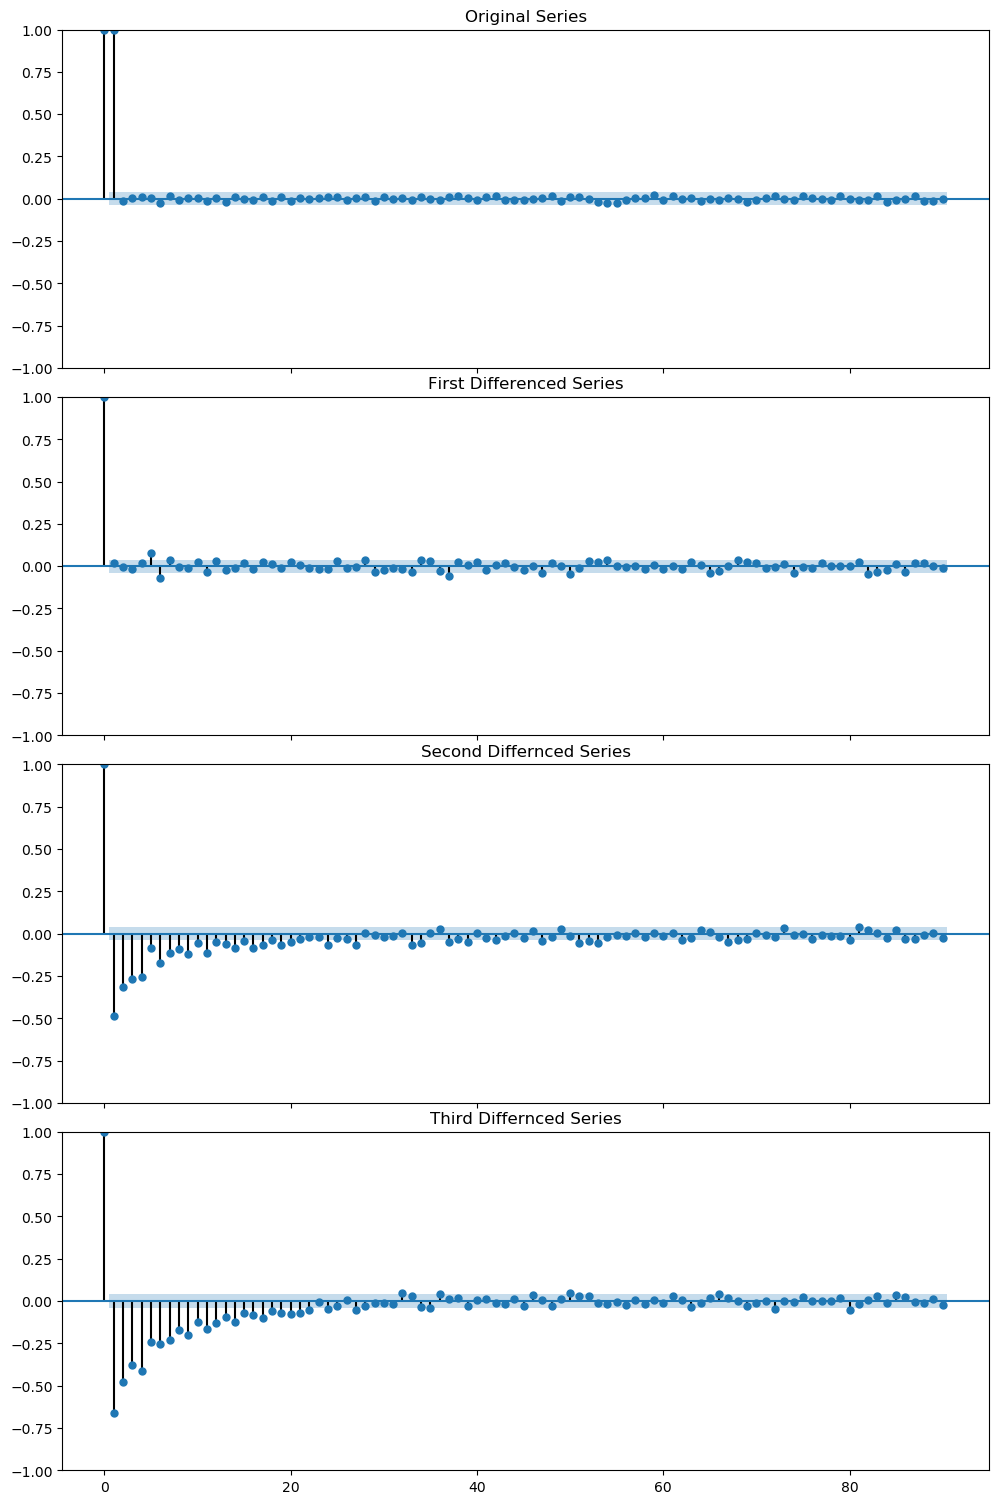

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, _plot_corr

timeseries = X_train

fig, axes = plt.subplots(4,1, sharex=True, figsize=(10,15))

fig.tight_layout()
plot_acf(timeseries, ax=axes[0], lags=90); axes[0].set_title("Original Series");
plot_acf(timeseries.diff().dropna(), ax=axes[1], lags=90); axes[1].set_title("First Differenced Series");
plot_acf(timeseries.diff().diff().dropna(), ax=axes[2], lags=90); axes[2].set_title("Second Differnced Series");
plot_acf(timeseries.diff().diff().diff().dropna(), ax=axes[3], lags=90); axes[3].set_title("Third Differnced Series");


**Inference:**
- 1st differenced series is close to stationary 
- 2nd differenced series is also close to stationary but has a large negative pacf at lag 1, this implies it is overdifferenced

Thus, a good choice for differnce order for ARIMA would be 1

*inference ka pta nhi but (2,3,2) parr bahut sahi result aa rha p=2,d=3,q=2*

<hr>

### PACF Plots

In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, _plot_corr

timeseries = X_train

fig, axes = plt.subplots(4,1, sharex=True, figsize=(10,15))

fig.tight_layout()
plot_pacf(timeseries, ax=axes[0], lags=90); axes[0].set_title("Original Series");
plot_pacf(timeseries.diff().dropna(), ax=axes[1], lags=90); axes[1].set_title("First Differenced Series");
plot_pacf(timeseries.diff().diff().dropna(), ax=axes[2], lags=90); axes[2].set_title("Second Differnced Series");
plot_pacf(timeseries.diff().diff().diff().dropna(), ax=axes[3], lags=90); axes[3].set_title("Third Differnced Series");
